<img align="left" src="img/ECE364-logo.png" width="300px" style="padding:30px;border:thin solid white;"> 

# Lecture 5 - Gradient Descent
## ECE364 - Programming Methods for Machine Learning
### Nickvash Kani 












###### Slides based off prior lectures by Alex Schwing, Aigou Han, Farzas Kamalabadi, Corey Snyder. All mistakes are my own!

In today's lecture: Gradient Descent!

- Motivation behind gradient descent
- One dimensional gradient descent
- Loss functions
- Fitting function to data


## Motivation:

Most of machine learning focuses on finding the minimum value of a function. The reason why this is the case will be discussed later in the lecture. 

But for now, here's the deal, we need to find the input values for which $f$ is minimized.

For simple functions this couldn't be easier: 

- $f=sin(x)$ - minimized at $f=-1$ where $x=\frac{3}{2}\pi$
- $f= ax^2 + bx + c$ - $f$ minimized at $x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$ if $a$ is positive, otherwise minimized a $x = \pm \infty$

For other functions, seems a bit harder:

- $f(x) = \frac{1}{3}(x-1)^6-(x-2)^5+5x^4.$ $f=0$ at $x=?$

Let's graph and see what we get: 

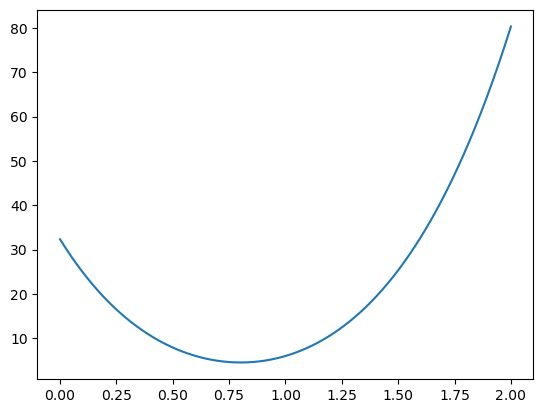

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 1000)
f_x = (1/3)*(x-1)**6-(x-2)**5+5*x**4
plt.figure()
plt.plot(x, f_x)

How do we find the minima? 

Methods to find minimum value:

- Iteratively? - guess an inital value for x and follow the curve until you reach the minima? 

0.801776123046875


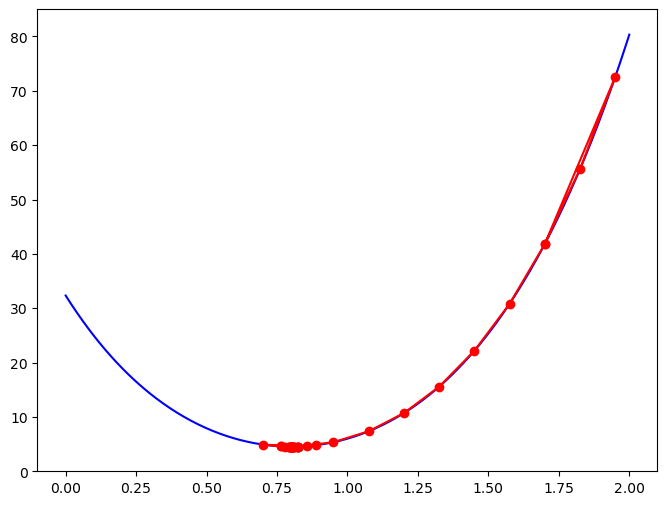

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f_x(x):
    return (1/3)*(x-1)**6 - (x-2)**5 + 5*x**4

# Iterative search parameters
x_start = 1.7  # Initial x value
delta = 0.25  # Initial step size
tolerance = 1e-5  # Convergence criterion
x_vals = [x_start]  # Store visited points
f_vals = [f_x(x_start)]

# Iterative search for the minimum
x = x_start
while True:
    x_next = x + delta
    f_current = f_x(x)
    f_next = f_x(x_next)

    if f_next > f_current:  # If function value increases, reduce step size and reverse direction
        delta = -delta / 2

    x = x_next
    x_vals.append(x)
    f_vals.append(f_x(x))

    # Check for convergence
    if abs(delta) < tolerance:
        break

# Generate plot data
x_range = np.linspace(0, 2, 400)
y_range = f_x(x_range)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_range, y_range, 'b-', label="Function $f(x)$")  # Function in blue
plt.plot(x_vals, f_vals, 'ro-', label="Iterative search")  # Search path in red with dots

# Set x and y limits
plt.xlim(-0.1, 2.1)
plt.ylim(0, 85)

# Ensure full box around the graph
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

# Show the plot
plt

print(x_vals[-1])

Problems with iterative method: 

- Dependent on x starting value 
    - if you chose x=100,  god help you
- Choosing the wrong initial increment can make things even worse and cause you to overshoot the minima

Would be nice if we can adjust increment as we get closer to the minima...

Notice the slope gets smaller the closer we get to the minima. This makes sense because we know th minima occurs when $ \frac{df}{dx} = 0$. Maybe we can use the derivative to scale our iteration inverval? This is known as **gradient descent**.

## Gradient Descent


- We know the gradient (and by analogy the derivative) points in the direction of steepest ascent
    - if we would like to minimize our function we should step in the direction of the negative gradient. 

- Suppose we have a differentiable function $f(x)$ that we would like to minimize but cannot find a closed form solution for the minimum. 
    - we will initialize a guess for the minimum, denoted as $x^{(0)}$. We will then update $x$ to the next guess by moving its value opposite of the gradient to $x^{(1)}$ and so on until the gradient is zero or sufficiently close to zero. Formally, we will iterate the following **gradient descent update equation**

$$
x^{(k+1)}=x^{(k)}-\alpha \nabla f(x).
$$

- Above, $\alpha >0$ is known as the **step-size** for gradient descent and controls how big our steps are in the direction of the negative gradient (more on selecting $\alpha$ in future lectures!). Note also that we are using the gradient notation even for single variable functions to generalize to when we consider the multivariable case.

Let's return to our prior function: 

$$
f(x) = \frac{1}{3}(x-1)^6-(x-2)^5+5x^4.
$$

The derivative is then given by
$$
\frac{df}{dx} = 2(x-1)^5-5(x-2)^4+20x^3.
$$

Apply gradient descent to the previous complicated function to approximate the value of $x$ that minimizes $f(x)$. For convenience:
$$
\begin{align*}
    f(x) &= \frac{1}{3}(x-1)^6-(x-2)^5+5x^4\\
    \frac{df}{dx} &= 2(x-1)^5-5(x-2)^4+20x^3\\
    x^{(k+1)} &= x^{(k)}-\alpha\nabla f(x).
\end{align*}
$$
Use a starting point of $x^{(0)}=0$ and $\alpha=10^{-3}$. Run gradient descent for 100 iterations, plot the values of $x^{(k)}$, and the magnitude of the gradient at each iteration.

**Bonus: try varying the initial value of $x$ and choice of $\alpha$.**

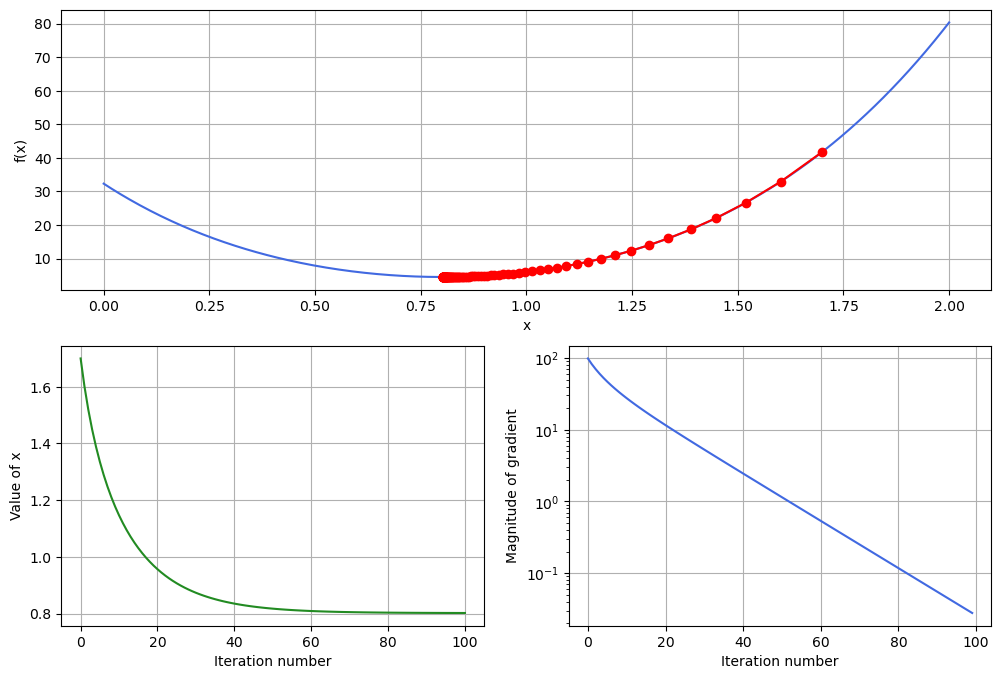

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1/3)*(x-1)**6 - (x-2)**5 + 5*x**4
    
n_iter = 100 # number of iterations
x_init = 1.7 # initial guess for x
alpha = 1e-3 # step size, 10**-3
x_values = [x_init]
x = x_init
gradients = []
for n in range(n_iter):
    # calculate gradient
    gradient = 2*(x-1)**5 - 5*(x-2)**4 + 20*x**3
    # perform gradient descent step to obtain next value
    x_next = x - alpha*gradient
    # store values of x and gradient
    x_values.append(x_next)
    gradients.append(gradient)
    # update x for next step
    x = x_next

x_range = np.linspace(0, 2, 400)    
# plotting
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(x_range, f(x_range), 'royalblue')
plt.plot(np.array(x_values), f(np.array(x_values)), 'ro-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.subplot(223)
plt.plot(np.arange(len(x_values)), x_values, 'forestgreen')
plt.xlabel('Iteration number')
plt.ylabel('Value of x')
plt.grid(True)
plt.subplot(224)
plt.semilogy(np.arange(n_iter), np.abs(gradients), 'royalblue')
plt.xlabel('Iteration number')
plt.ylabel('Magnitude of gradient')
plt.grid(True)

Much more can be shown about gradient descent including variations on gradient descent, convergence guarantees, convergence rates, and more. For the purposes of this course, we primarily need to motivate the use of gradient descent for machine learning problems and other interesting details are best left to ECE 490: Introduction to Optimization.

## Drawback #1

Gradient descent isn't perfect. It can get stuck in a local minima. To demonstrate this point, let's return to our complex equation from the prior lectures: 

$e(x) = x^2$, $g(e) = e+1$, $h(g) = \log(g)$, $k(h) = \sin(h)$. Thus, $f(x) = k(h(g(x)))$

The resulting function is: $$f(x) = \sin(\log(((x)^2+1)))$$


<img align="center" src="img/comp_graph_example_1d_2.png" width="1000px" style="padding:30px;border:thin solid white;"> 

$$\frac{df}{dx} = \left.\frac{dk}{dh}\right|_{h(g)} \cdot \left.\frac{dh}{dg}\right|_{g(x)} \cdot \left.\frac{dg}{de}\right|_{e(x)} \cdot \left.\frac{de}{dx}\right|_x$$

$$\frac{df}{dx} = \cos(h(g)) \cdot \frac{1}{g(x)} \cdot 1 \cdot 2x = \cos(\log(x^2+1)) \cdot \frac{1}{x^2+1} \cdot 2x= \frac{2x\cos(\log(x^2+1))}{x^2+1}$$

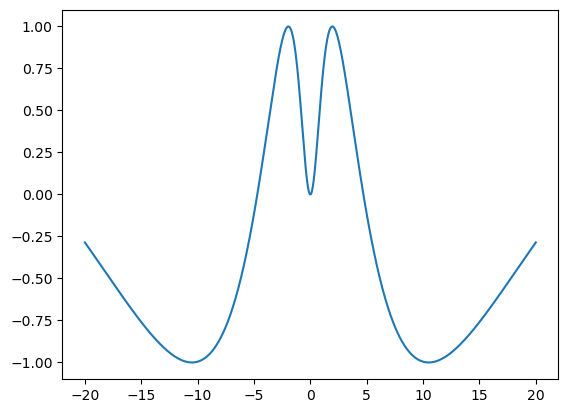

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-20, 20, 1000)
f_x = np.sin(np.log(x**2 + 1))
plt.figure()
plt.plot(x, f_x)

Let's find the minima of the function!

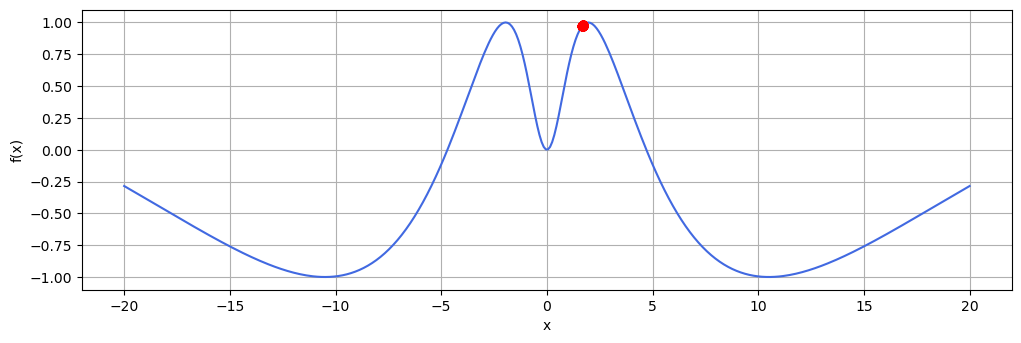

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(np.log(x**2+1))
    
n_iter = 100 # number of iterations
x_init = 1.7 # initial guess for x
#x_init = 2.5 # initial guess for x
alpha = 1e-3 # step size, 10**-3
x_values = [x_init]
x = x_init
gradients = []
for n in range(n_iter):
    # calculate gradient
    gradient = 2*x*np.cos(np.log(x**2+1))/(x**2+1)
    # perform gradient descent step to obtain next value
    x_next = x - alpha*gradient
    # store values of x and gradient
    x_values.append(x_next)
    gradients.append(gradient)
    # update x for next step
    x = x_next

#print(x_values)
x_range = np.linspace(-20, 20, 400)    
# plotting
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(x_range, f(x_range), 'royalblue')
plt.plot(np.array(x_values), f(np.array(x_values)), 'ro-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

## Automatic Differentiation

The optimization above had one big drawback, I had to hand calculate the gradients symbolically and enter in the correct values. But what I can't do that for all math functiond and unfortunately,  we must develop an efficient and exact method for computing gradients automatically for arbitrarily complicated functions. There are a few options:

* Numeric differentiation, i.e. finite differences: choose a suitably small value of $h$ to approximate $f'(x)$.
  $$
  \frac{df}{dx} = \underset{h\to 0}{\textrm{lim}}~\frac{f(x+h)-f(x)}{h}
  $$


* Symbolic differentiation: compose derivatives/gradients in symbolic closed-form using simple rules, i.e. chain rule. Evaluate this expression to compute gradients.

* Backpropagation: construct a computational graph of a function and use simple derivative/gradient rules to evaluate small pieces of the gradient and accumulate results via chain rule. (**This is what we will use!**)

## Objective Functions

What if we do **not** want to calculate a minima. Let's say we want to know for what value of $x$ the prior function $f=0.5$. 

Well to do that, we need to change our optimization by defining a new **objective function**.

The simplest version of an optimization problem may be stated as follows:
$$
\underset{x}{\min}f(x).
$$
The above expression gives an unconstrained optimization problem, i.e. no constraints on values $x$ can attain, where we look to find $x$ that minimizes the given **objective function** $f(x)$. 

But again, that will just give us the walue of $x$ where the whole thing evaluates to 0. **I want to know when the function evaluates to 0.5!** 

One way to do this is to wrap this function ($f(x)$) up in a new  that is smallest when $f(x)=0.5$. 

And the clever trick we can do is write a new function that take $y_i$ as a input and makes it with our desired output. One highly popular choice is **mean squared error** (MSE). 
$$
\ell_{\textrm{mse}}=(y-f(x))^2.
$$
The intuition for squaring the errors, $y_i-f(x_i)$, is that we want positive and negative errors to be treated the same.  

So let's try an example. 

Let's try our someplex function from above: 

$$f(x) = \sin(\log(((x)^2+1)))$$

but this time let's add another layer to it and say the loss

$$
\ell_{\textrm{mse}}=(0.5-f(x))^2.
$$

and the gradient for this function would be: 

$$
\frac{\partial}{\partial x}\ell_{\textrm{mse}}=2\dot(0.5-f(x))\cdot\frac{\partial f(x)}{\partial x}.
$$


Code would look something like: 



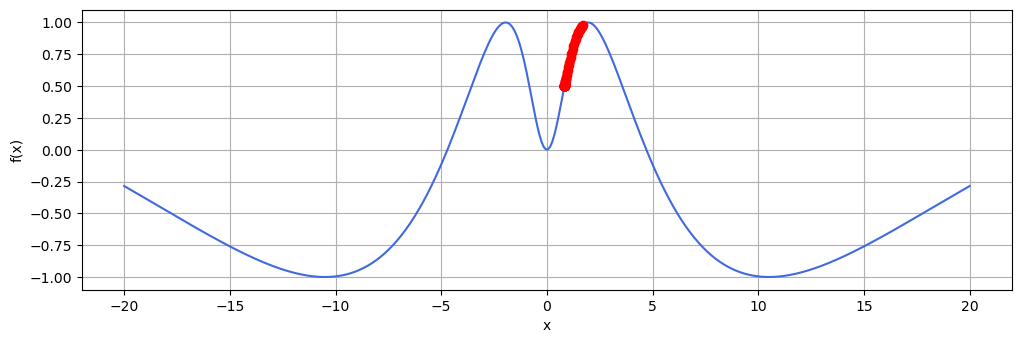

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(np.log(x**2+1))
    
n_iter = 100 # number of iterations
x_init = 1.7 # initial guess for x
#x_init = 2.5 # initial guess for x
alpha = 100e-3 # step size, 10**-3
x_values = [x_init]
x = x_init
gradients = []
for n in range(n_iter):
    # calculate gradient
    gradient = 2*(0.5-f(x))*-1*2*x*np.cos(np.log(x**2+1))/(x**2+1)
    # perform gradient descent step to obtain next value
    x_next = x - alpha*gradient
    # store values of x and gradient
    x_values.append(x_next)
    gradients.append(gradient)
    # update x for next step
    x = x_next

#print(x_values)
x_range = np.linspace(-20, 20, 400)    
# plotting
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(x_range, f(x_range), 'royalblue')
plt.plot(np.array(x_values), f(np.array(x_values)), 'ro-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

## Estimating parameters to match multiple data values

Consider the problem of finding the parameters which make a particular equation best fit soem collection of data. We may accomplish by first posing a reasonable optimization problem. Suppose we refer to our dataset $\mathcal{D}=\{(x_i, y_i)\}_{i=1}^{N}$ as $N$ tuples of inputs and outputs. For a given guess of set of parameters, the function will produce $f(x_i)$ while the correct or **ground-truth** value $y_i$ may be different. Thus, for current values of $(a, b, c)$, we have some amount of error. We need a reasonable objective function to minimize these errors with respect to this dataset. We can take the mean (average) of the sum of squared errors over the dataset. Let $\ell_{\textrm{mse}}(\mathcal{D})$ denote the MSE over the dataset.
$$
\ell_{\textrm{mse}}=\frac{1}{N}\sum_{i=1}^{N}(y_i-f(x_i))^2.
$$
The intuition for squaring the errors, $y_i-f(x_i)$, is that we want positive and negative errors to be treated the same. We now have all the elements of a well-posed optimization problem!

**Alertness check:** What is the function represented by the following computation graph: 

<div>
<center><img src="img/quadratic-regression-graph.png" width="1000"/> </center>
</div>

For just one data point, we can perform the forward pass to calculate values at each node, i.e. $ax^2$, $bx$, $\ell_{\textrm{mse}}(x_i, y_i)$. Then, we initiate backpropagation from the seed node to automatically compute the gradient of the loss function with respect to each parameter, i.e. $\frac{\partial \ell_{\textrm{mse}}}{\partial a}, \frac{\partial \ell_{\textrm{mse}}}{\partial b}, \frac{\partial \ell_{\textrm{mse}}}{\partial c}$. For completeness, we can easily derive these partial derivatives from the computational graph.

\begin{align*}
    \frac{\partial \ell_{\textrm{mse}}}{\partial w_7} &= 1 & \frac{\partial w_7}{\partial w_6} &= 2(w_6-w_5)\\
    \frac{\partial w_7}{\partial w_5} &= -2(w_6-w_5) & \frac{\partial w_5}{\partial w_4} &= 1\\
    \frac{\partial w_5}{\partial w_3} &= 1 & \frac{\partial w_5}{\partial c} &= 1\\
    \frac{\partial w_4}{\partial b} &=w_1 & \frac{\partial w_4}{\partial w_1} &=b\\
    \frac{\partial w_3}{\partial a} &=w_2 & \frac{\partial w_3}{\partial w_2} &=a\\
    \frac{\partial w_2}{\partial w_1} &=2w_1
\end{align*}

And finally, the adjoints:
\begin{align*}
    \bar{w}_7 &= \frac{\partial \ell_{\textrm{mse}}}{\partial w_7}\\
    \bar{w}_5 &= \bar{w}_7\frac{\partial w_7}{\partial w_5} = -2(w_6-w_5) &\bar{c} &= \bar{w}_5\frac{\partial w_5}{c} = -2(w_6-w_5)\\
    \bar{w}_4 &= \bar{w}_5\frac{\partial w_5}{\partial w_4} = -2(w_6-w_5) &\bar{w}_3 &= \bar{w}_5\frac{\partial w_5}{\partial w_3} = -2(w_6-w_5)\\
    \bar{b} &= \bar{w}_4\frac{\partial w_4}{\partial b} = -2w_1(w_6-w_5) &\bar{a} &= \bar{w}_3\frac{\partial w_3}{\partial a} = -2w_2(w_6-w_5)
\end{align*}

Note that we do not give $\bar{w}_6$, $\bar{w}_1$, and $\bar{w}_2$ since they are not necessary for this problem for deriving the partial derivatives with respect to $a$, $b$, and $c$. The above quantities give the result of backpropagation for one data point. However, we have a dataset of $N$ points, so how can we perform backpropagation across the whole dataset? We can just add the gradients due to each input-output pair! Differentiation is linear; thus, gradient of the entire objective with respect to $a$, $b$, and $c$ is the sum of the gradients for each entry in the dataset.

Manually performing gradient descent works, but we don't want to have to type expressions for partial derivatives for every parameter especially when the number of parameters grows to hundreds, thousands, or millions!

## Combining Gradient Descent and Backpropagation

Recall from the first part of our autodifferentiation lectures that gradient descent for a given optimization problem proceeds as follows
$$
x^{(k+1)} = x^{(k)}-\alpha\nabla f(x)
$$
for step size $\alpha$ at iteration $k$. Now in the above example, we have a function with one input, but three parameters for which we are computing the gradient. Let $\theta=\{a, b, c\}$ represent these three parameters as a vector. We can thus write our gradient descent update equation instead as
$$
\theta^{(k+1)} = \theta^{(k)}-\alpha\nabla_\theta f(x),
$$
where the use of this $\theta$ notation implies the following three equations:
$$
\begin{align*}
a^{(k+1)} &= a^{(k)}-\alpha\frac{\partial f(x)}{\partial a}\\
b^{(k+1)} &= b^{(k)}-\alpha\frac{\partial f(x)}{\partial b}\\
c^{(k+1)} &= c^{(k)}-\alpha\frac{\partial f(x)}{\partial c}.
\end{align*}
$$
The above notation is often used in machine learning applications where a variable like $\theta$ is used to collect all trainable or learnable parameters as shorthand for gradient descent. Similarly, you may also see notation like $f(x;\theta)$ where the semi-colon distinguishes between inputs like $x$ and parameters of the function $\theta$.

Even without our knowledge of backpropagation or PyTorch, we could apply gradient descent to the above example since the partial derivatives are fairly easy to find by hand.

$$
\begin{align*}
    \frac{\partial\ell_{\textrm{mse}}(f(x_i), y_i)}{\partial a} &= -2x_i^2(y_i-ax_i^2-bx_i-c)\\
    \frac{\partial\ell_{\textrm{mse}}(f(x_i), y_i)}{\partial b} &= -2x_i(y_i-ax_i^2-bx_i-c)\\
    \frac{\partial\ell_{\textrm{mse}}(f(x_i), y_i)}{\partial c} &= -2(y_i-ax_i^2-bx_i-c)\\
\end{align*}
$$

Initial guesses: a=-1.179648, b=0.467805, c=0.313049
Final guesses: a=2.823157, b=1.923079, c=1.420865


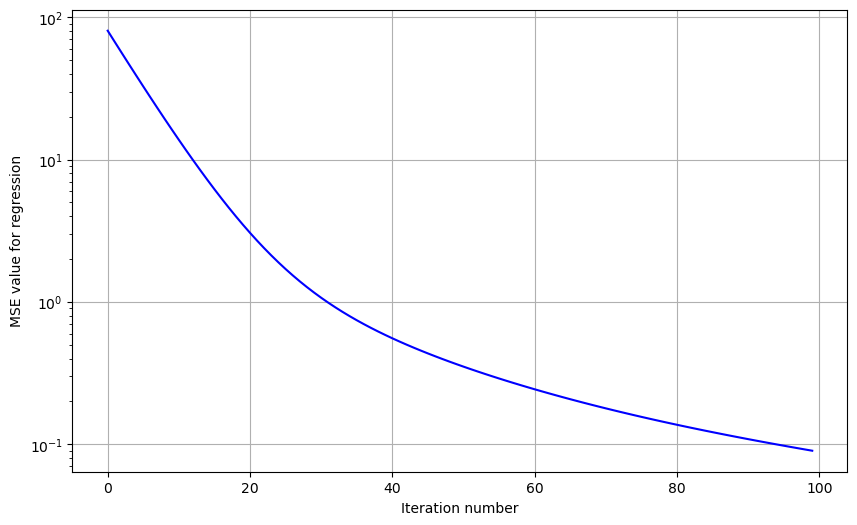

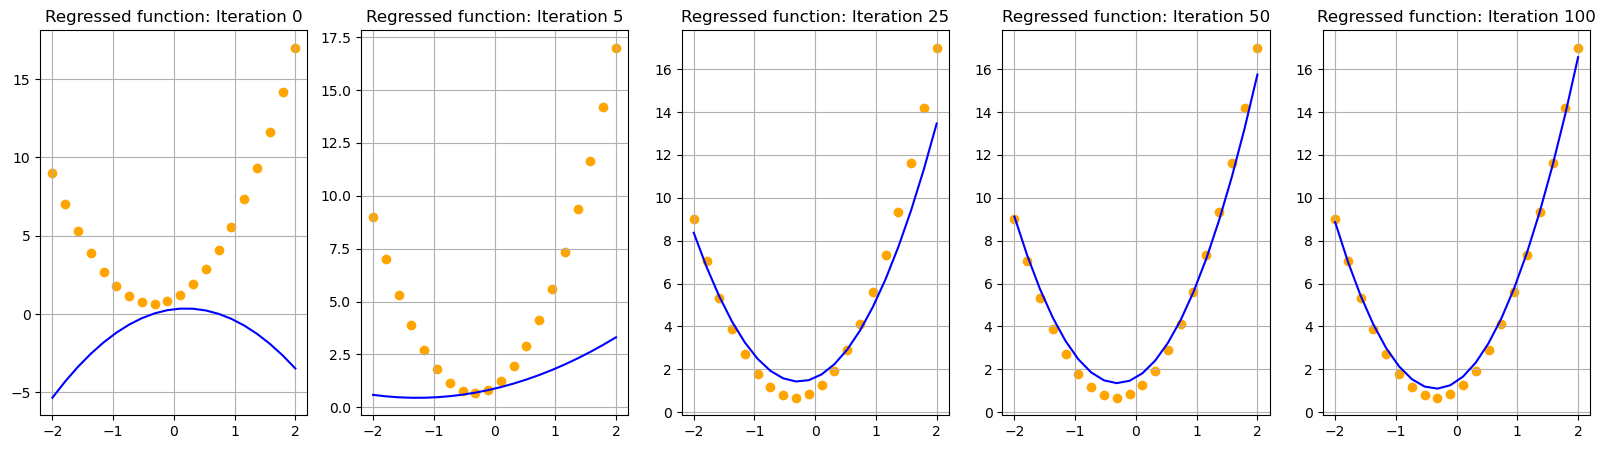

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# values we are trying to regress, pretend we don't know them!
a = 3
b = 2
c = 1

# generate dataset
N = 20 # number of data points
x = np.linspace(-2, 2, N)
y = a*x**2 + b*x + c

# initialize guesses for a, b, and c
a_gd = np.random.randn()
b_gd = np.random.randn()
c_gd = np.random.randn()
print('Initial guesses: a={:.6f}, b={:.6f}, c={:.6f}'.format(a_gd, b_gd, c_gd))

# information for tracking
a_vals = [a_gd]
b_vals = [b_gd]
c_vals = [c_gd]
loss_vals = []

# gradient descent loop
n_iter = 100 # number of iterations
alpha = 1e-2 # step size
for n in range(n_iter):
    # let numpy broadcasting compute all partials across the dataset
    errors = y-(a_gd*x**2 + b_gd*x + c_gd)
    partial_a = np.sum(-2*x**2*errors)/N
    partial_b = np.sum(-2*x*errors)/N
    partial_c = np.sum(-2*errors)/N
    # perform gradient descent update step
    a_gd = a_gd - alpha*partial_a
    b_gd = b_gd - alpha*partial_b
    c_gd = c_gd - alpha*partial_c
    # log information
    loss_vals.append(np.sum(errors**2)/N) # log MSE
    a_vals.append(a_gd)
    b_vals.append(b_gd)
    c_vals.append(c_gd)

# examine solution
print('Final guesses: a={:.6f}, b={:.6f}, c={:.6f}'.format(a_vals[-1], b_vals[-1], c_vals[-1]))

# visualize loss and progression of solution
plt.figure(figsize=(10, 6))
plt.semilogy(loss_vals, color='blue')
plt.grid(True)
plt.xlabel('Iteration number')
plt.ylabel('MSE value for regression')

iter_num = np.array([0, 5, 25, 50, 100]).astype(int)

plt.figure(figsize=(20, 5))
for j, i in enumerate(iter_num):
    plt.subplot(1, 5, j+1)
    curr_fn = a_vals[i]*x**2 + b_vals[i]*x + c_vals[i]
    plt.plot(x, curr_fn, color='blue')
    plt.scatter(x, y, color='orange')
    plt.grid(True)
    plt.title('Regressed function: Iteration {}'.format(i))

## Using PyTorch Autograd

We have briefly explored the PyTorch Autograd engine in previous lectures thus far. Now, we want to utilize it to automatically perform backpropagation for us and make gradient descent much more scalable!

Let's start by showing how the previous example can be converted from Numpy to PyTorch code:

Initial guesses: a=-1.012377, b=-0.415224, c=-1.208924
Final guesses: a=3.086846, b=1.878748, c=0.791994


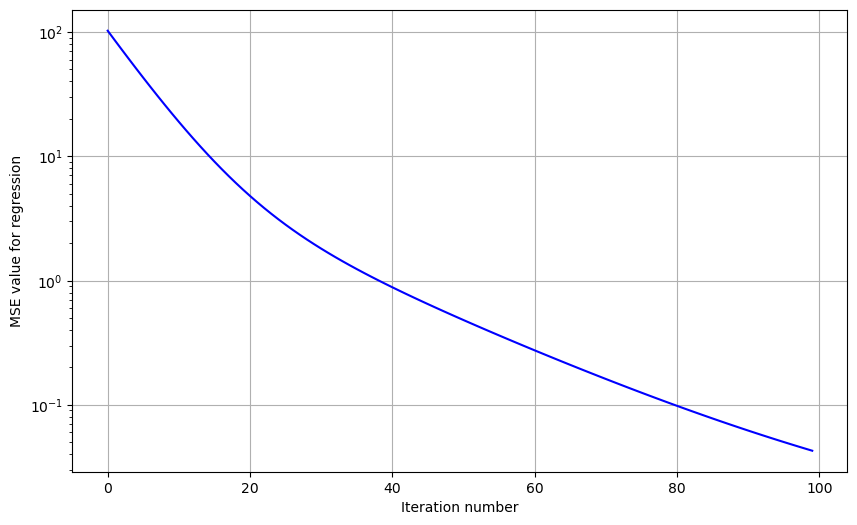

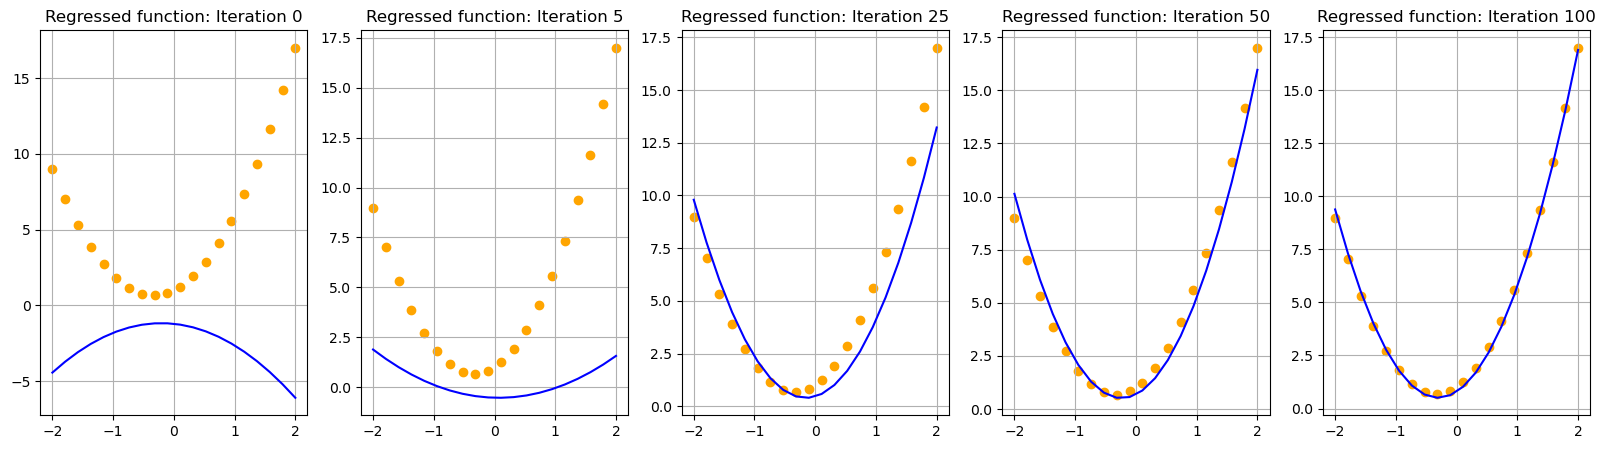

In [8]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# values we are trying to regress, pretend we don't know them!
a = 3
b = 2
c = 1

# generate dataset
N = 20 # number of data points
x = torch.linspace(-2, 2, N)
y = a*x**2 + b*x + c

# initialize guesses for a, b, and c
a_gd = torch.randn((), requires_grad=True) # size (1,)
b_gd = torch.randn((), requires_grad=True)
c_gd = torch.randn((), requires_grad=True)
print('Initial guesses: a={:.6f}, b={:.6f}, c={:.6f}'.format(a_gd.data, b_gd.data, c_gd.data))

# information for tracking
a_vals = [a_gd.data.item()]
b_vals = [b_gd.data.item()]
c_vals = [c_gd.data.item()]
loss_vals = []

# gradient descent loop
n_iter = 100 # number of iterations
alpha = 1e-2 # step size
for n in range(n_iter):
    # compute loss function (objective function)
    errors = y-(a_gd*x**2 + b_gd*x + c_gd)
    loss = torch.sum((errors)**2)/N
    # backpropagate gradients
    loss.backward()
    # perform gradient descent update step
    with torch.no_grad():
        # don't want the gradient update step to accumulate further gradients at a, b, and c
        a_gd -= alpha*a_gd.grad
        b_gd -= alpha*b_gd.grad
        c_gd -= alpha*c_gd.grad
        # manually zero out the gradients before next backward pass
        a_gd.grad = None
        b_gd.grad = None
        c_gd.grad = None
        
    # log information
    loss_vals.append(loss.item()) # log MSE
    a_vals.append(a_gd.data.item())
    b_vals.append(b_gd.data.item())
    c_vals.append(c_gd.data.item())

# examine solution
print('Final guesses: a={:.6f}, b={:.6f}, c={:.6f}'.format(a_vals[-1], b_vals[-1], c_vals[-1]))

# visualize loss and progression of solution
plt.figure(figsize=(10, 6))
plt.semilogy(loss_vals, color='blue')
plt.grid(True)
plt.xlabel('Iteration number')
plt.ylabel('MSE value for regression')

iter_num = np.array([0, 5, 25, 50, 100]).astype(int)
plt.figure(figsize=(20, 5))
for j, i in enumerate(iter_num):
    plt.subplot(1, 5, j+1)
    curr_fn = a_vals[i]*x**2 + b_vals[i]*x + c_vals[i]
    plt.plot(x.detach().numpy(), curr_fn.detach().numpy(), color='blue')
    plt.scatter(x.detach().numpy(), y, color='orange')
    plt.grid(True)
    plt.title('Regressed function: Iteration {}'.format(i))

A few notes to the above implementation:

* ``requires_grad=True``: Recall that we set this attribute to True when we would like to access gradients for the given tensor. In this case, we wanted gradients for tensors ``a_gd``, ``b_gd``, and ``c_gd`` since they are our parameters of interest.
* ``.data.item()``: The ``.data`` attribute accesses only the data in the tensor, but still returns a tensor. If we want just the numerical data outside of the tensor data structure, we need to also call the ``.item()`` method.
* ``torch.no_grad()``: The ``torch.no_grad()`` method specifies that no computation within its scope will alter gradients within a computational graph. In our above example, we do not want the gradient descent update step to affect the gradients we already backpropagated. This is also why we used ``-=`` instead of ``a_gd = a_gd - ...`` since this would remove the ``requires_grad`` from each tensor.
* Setting gradients to ``None``: The gradients at each node in the graph remain there until they are cleared. Thus, we need to remove them by setting each to ``None`` before the next backpropagation pass.
* ``detach.numpy()``: The tensor ``x`` belongs to computational graph that require gradients. We must first detach these tensors from the computational graph if we intend to convert them to NumPy arrays for plotting. Alternatively, we could wrap our plotting in a ``torch.no_grad()`` statement.

Some of these above points, e.g. specifying every Tensor that needs gradients, setting gradients to ``None``, and even applying the gradient descent step to every parameters, may seem tedious. And that's okay! In later lectures, we will show how the ``nn.Module`` class and ``torch.optim`` module greatly simplify code like above to only require a few lines instead of around a dozen.

For now, we have successfully used PyTorch and its auto-differentiation engine to perform our first machine learning problem! Let's conclude this lecture with another example.

## One more function fit for the road?

Recall from an earlier lecture where we introduced the sigmoid function $\sigma(x)$:
$$
\sigma(x) = \frac{1}{1+e^{-x}}.
$$
We extended sigmoid in one lecture exercise to have a different center point, i.e. where $\sigma(x)=0.5$, and a sharper/smoother transition. Consider this augmented sigmoid function as $\tilde{\sigma}(x)$:
$$
\tilde{\sigma}(x) = \frac{1}{1+\exp{\{-\frac{x-b}{\tau}}\}},
$$
where $b$ and $\tau$ give the center point and shape parameter, respectively. For this exercise, we would will use PyTorch, backpropagation, and gradient descent to automatically determine the $b$ and $\tau$ values of a mystery sigmoid function. We can again use mean squared error to minimize the following objective function over dataset $\mathcal{D}=\{(x_i, y_i)\}$ where each $y_i$ is generated from a mystery sigmoid function $\tilde{\sigma}(x_i)$.
$$
\underset{b, \tau}{\min}~\frac{1}{N}\sum_{i=1}^{N}(y_i-f(x_i;b,\tau))^2
$$

Let's generate some datapoitns we want to fit to: 

In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# "unknown" parameters we are trying to uncover
b = -0.75
tau = 2.25

# create dataset
N = 30 # number of datapoints
x = torch.linspace(-10, 10, N)
y = 1/(1+torch.exp(-(x-b)/tau))


Generate an inital guess of the parameters:

In [10]:
# part (a) initialize parameters
b_gd = torch.randn((), requires_grad=True)
tau_gd = torch.rand((), requires_grad=True) # tau_gd = torch.tensor([0.2], requires_grad=True)
print('Initial Guess: b={:.4f}, tau={:.4f}'.format(b_gd.data.item(), tau_gd.data.item()))

Initial Guess: b=0.0048, tau=0.7914


The we go through the backpropagation process: 

In [11]:
# part (b) gradient descent loop
n_iter = 500
alpha = 1e0
b_vals = [b_gd.data.item()]
tau_vals = [tau_gd.data.item()]

for n in range(n_iter):
    # compute function outputs
    f_x = 1/(1+torch.exp(-(x-b_gd)/tau_gd))
    # calculate loss and initiate backpropagation
    loss = torch.mean((y-f_x)**2) # same as torch.sum((y-f_x)**2)/N
    loss.backward()
    # update parameters by gradient descent
    with torch.no_grad():
        # gradient step
        b_gd -= alpha*b_gd.grad
        tau_gd -= alpha*tau_gd.grad
        # set gradients to None
        b_gd.grad = None
        tau_gd.grad = None
    b_vals.append(b_gd.data.item())
    tau_vals.append(tau_gd.data.item())

Plot the results:

Final Guess: b=-0.7330, tau=2.2412


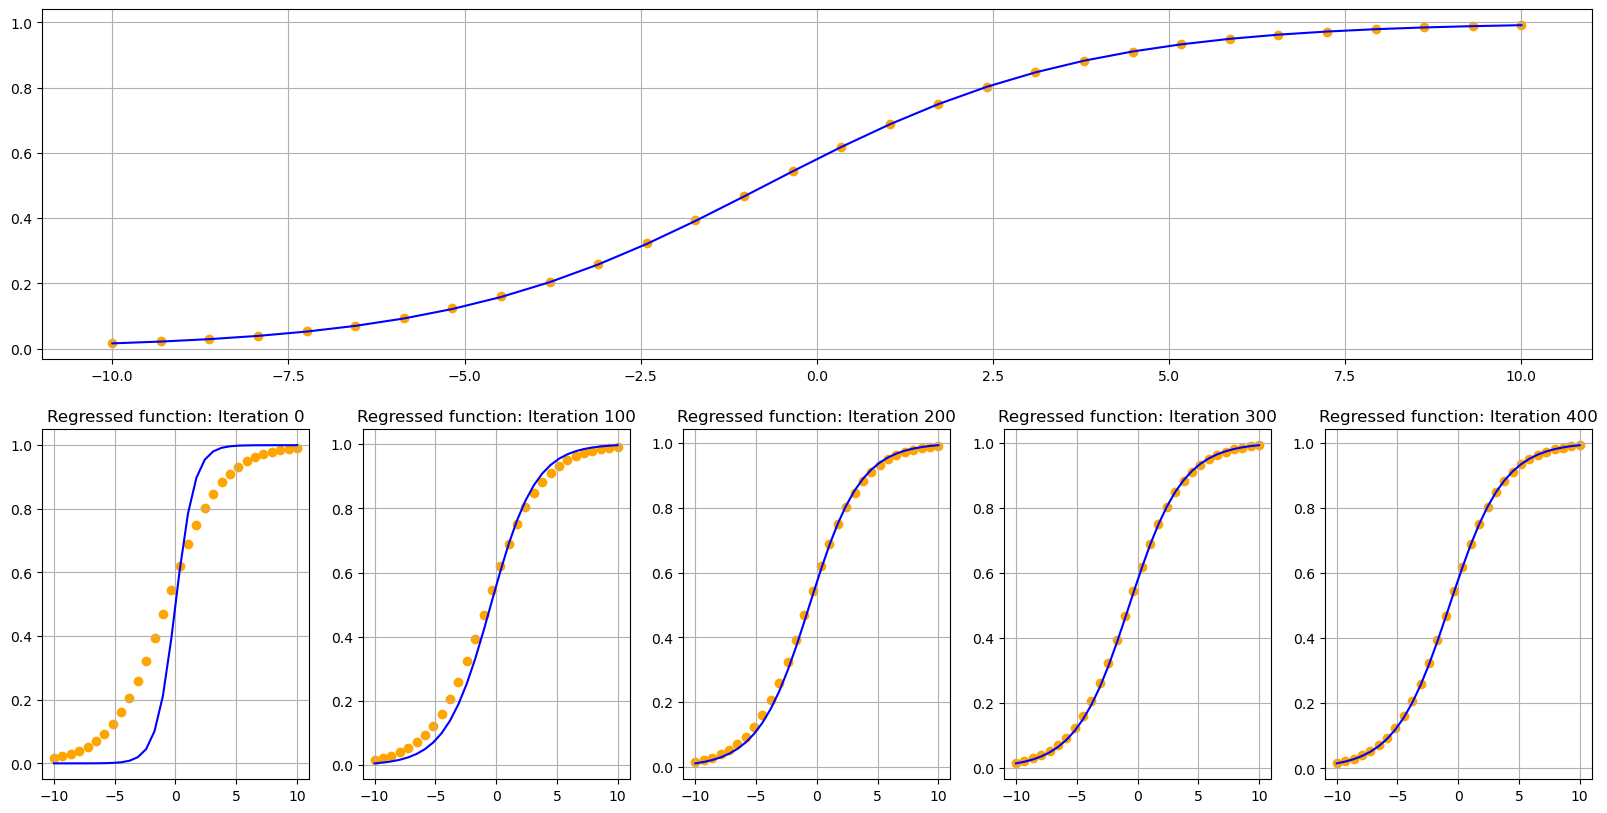

In [12]:
# print final guesses
print('Final Guess: b={:.4f}, tau={:.4f}'.format(b_gd.data.item(), tau_gd.data.item()))
        
# part (c) plotting solution
plt.figure(figsize=(20, 10))
with torch.no_grad():
    plt.subplot(2,1,1)
    plt.scatter(x.numpy(), y.numpy(), color='orange')
    f_x = 1/(1+torch.exp(-(x-b_gd)/tau_gd)) # fill in this line, apply your parameters to the input data in x
    plt.plot(x.numpy(), f_x.numpy(), color='blue')
    plt.grid(True)

iter_num = np.array([0, 100, 200, 300, 400]).astype(int)
for j, i in enumerate(iter_num):
    plt.subplot(2, 5, 5+j+1)
    curr_fn = 1/(1+torch.exp(-(x-b_vals[i])/tau_vals[i]))
    plt.plot(x.detach().numpy(), curr_fn.detach().numpy(), color='blue')
    plt.scatter(x.detach().numpy(), y, color='orange')
    plt.grid(True)
    plt.title('Regressed function: Iteration {}'.format(i))    
    

## That's it for today

- Have a good weekend
- Remember HW2 is due Monday